
## Data
The source of the data is the following link: [LINK](https://data.world/houston/houston-electricity-bills)

There are 4 files, they are:
1. July 2011 to June 2012 excel file - 57,430 rows and 24 columns
2. May 2012 to April 2013 excel file - 65,806 rows and 24 columns
3. July 2012 to June 2013 excel file - 66,776 rows and 24 columns
4. July 2013 to June 2014 excel file - 67,838 rows and 24 columns

The data tables contain information regarding the building address, location, service number, billing dates, total amount due. 

The plan is to go through and clean the data tables individually and make them consistent. Once that is done the next step is to merge the cleaned data tables. After merging the tables one important check is to search for duplicates since there is an overlap of dates it is highly likely that there will be duplicates.

Description of each column 
1. Reliant Contract No: A unique identifier for each contract. 
2. Service Address: Address for the service location
3. Meter No: Meter number for the service location.
4. ESID: Electric Service Identifier for the service location.
5. Business Area: Business area code for the service location.
6. Cost Center: Cost center code for the service location.
7. Fund: Fund code for the service location.
8. Bill Type: Type of bill (e.g. "T" for "Total", "P" for "Partial", etc.). 
9. Bill Date: Date the bill was generated. 
10. Read Date: Date the meter was read. 
11. Due Date: Due date for the bill. 
12. Meter Read: Meter reading for the service location. 
13. Base Cost: TBase cost for the service. 
14. T&D Discretionary: Transmission and Distribution Discretionary charge for the service. 
15. T&D Charges: Transmission and Distribution charge for the service. 
16. Current Due: Current due amount for the service.
17. Index Charge: Index charge for the service. 
18. Total Due: Total due amount for the service. 
19. Franchise Fee: Franchise fee for the service. 
20. Voucher Date: Date the voucher was issued for the service. 
21. Billed Demand: Billed demand for the service in KVA. 
22. kWh Usage: Kilowatt-hour usage for the service. 
23. Nodal Cu Charge:  Nodal Cu Charge for the service. 
24. Adder Charge:  Adder Charge for the service.

Statistical Data Type of Each Column 
1. Reliant Contract No: integer (ratio)
2. Service Address: string (nominal)
3. Meter No: integer (nominal)
4. ESID: integer (nominal)
5. Business Area: integer (ratio))
6. Cost Center: integer (ratio)
7. Fund: integer (ratio)
8. Bill Type: string (nominal)
9. Bill Date: date (nominal)
10. Read Date: date (nominal)
11. Due Date: date (nominal)
12. Meter Read: integer (ratio)
13. Base Cost: float (nominal)
14. T&D Discretionary: float (nominal)
15. T&D Charges: float (nominal)
16. Current Due: float (nominal)
17. Index Charge: float (nominal)
18. Total Due: float (nominal)
19. Franchise Fee: float (nominal)
20. Voucher Date: date (nominal)
21. Billed Demand (KVA): integer (nominal)
22. kWh Usage: integer (nominal)
23. Nodal Cu Charge: float (nominal)
24. Adder Charge: float (nominal)

## Problem
The key issue in generating electricity is to determine how much capacity to generate in order to meet future demand. 

Electricity usage forecasting involves predicting the demand for electricity over a specific eriod. This process has several uses, including energy procurement, where it helps suppliers purchase the right amount of energy to ensure a steady supply.

The advancement of smart infrastructure and integration of distributed renewable power has raised future supply, demand, and pricing uncertainties. This unpredictability has increased interest in price prediction and energy analysis.

## Research Question
Classification of bill type can be done using features in the data (Classification) - Sharmisha

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score

pd.options.display.max_columns=25

In [48]:
data_2014 = pd.read_excel('houston-houston-electricity-bills/coh-fy2014-ee-bills-july2013-june2014.xlsx')
orig_shape_2014 = data_2014.shape[0]

data_2014.shape

(67838, 24)

In [49]:
data_2014.head(5)

,Reliant Contract No,Service Address,Meter No,ESID,Business Area,Cost Center,Fund,Bill Type,Bill Date,Read Date,Due Date,Meter Read,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Index Charge ($),Total Due ($),Franchise Fee ($),Voucher Date,Billed Demand (KVA),kWh Usage,Nodal Cu Charge ($),Adder Charge ($)
0,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2014-05-28,2014-05-21,2014-06-27,64981.0,36098.63,2600.53,10078.92,50249.89,0.0,50249.89,-1014.83,2014-05-29,1470.526316,818192,479.19,0.0
1,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2014-04-28,2014-04-22,2014-05-28,64299.0,38619.91,2576.95,9978.70,52378.23,0.0,52378.23,-1005.86,2014-04-29,1442.268041,875338,161.23,0.0
2,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2014-03-27,2014-03-23,2014-04-26,63569.0,36275.51,2538.54,9896.25,49788.85,0.0,49788.85,-981.00,2014-03-28,1425.000000,822201,93.04,0.0
3,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2014-02-27,2014-02-23,2014-03-29,62884.0,43283.31,2207.88,9373.41,56056.70,0.0,56056.70,-1053.49,2014-02-28,1513.265306,981036,77.36,0.0
4,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2014-01-27,2014-01-21,2014-02-26,62066.0,37987.10,1992.16,8762.55,49748.12,0.0,49748.12,-950.63,2014-01-30,1373.195876,860995,17.73,0.0


In [50]:
data_types = {}
for col in data_2014.columns:
    dtype = data_2014[col].dtype
    if dtype == 'object':
        data_types[col] = 'nominal'
    elif dtype.name == 'category':
        data_types[col] = 'ordinal'
    elif dtype.name.startswith('int') or dtype.name.startswith('float'):
        data_types[col] = 'ratio'
    else:
        data_types[col] = 'unknown'
        
print(data_types)

{'Reliant Contract No': 'ratio', 'Service Address ': 'nominal', 'Meter No': 'nominal', 'ESID': 'nominal', 'Business Area': 'ratio', 'Cost Center': 'ratio', 'Fund': 'ratio', 'Bill Type': 'nominal', 'Bill Date': 'unknown', 'Read Date': 'unknown', 'Due Date': 'unknown', 'Meter Read': 'ratio', 'Base Cost ($)': 'ratio', 'T&D Discretionary ($)': 'ratio', 'T&D Charges ($)': 'ratio', 'Current Due ($)': 'ratio', 'Index Charge ($)': 'ratio', 'Total Due ($)': 'ratio', 'Franchise Fee ($)': 'ratio', 'Voucher Date': 'unknown', 'Billed Demand (KVA)': 'ratio', 'kWh Usage': 'ratio', 'Nodal Cu Charge ($)': 'ratio', 'Adder Charge ($)': 'ratio'}


In [51]:
data_2014.describe()

,Reliant Contract No,Business Area,Cost Center,Fund,Meter Read,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Index Charge ($),Total Due ($),Franchise Fee ($),Billed Demand (KVA),kWh Usage,Nodal Cu Charge ($),Adder Charge ($)
count,6.783800e+04,67838.000000,6.783800e+04,67838.000000,67822.000000,67832.000000,67838.000000,67838.000000,67838.000000,67835.000000,67838.000000,67838.000000,67822.000000,6.783800e+04,67831.000000,67835.000000
mean,4.466026e+06,2234.462985,2.234508e+09,3905.364972,11922.180792,752.493762,346.176442,243.271038,1429.004427,51.921319,1428.948580,-30.802815,41.816244,1.757642e+04,2.847491,8.410448
std,3.538467e+06,610.308174,6.103035e+08,3554.304295,19950.210597,8850.260472,11412.058754,1761.077978,17419.486301,1745.464417,17420.904924,210.583496,365.658193,1.925858e+05,42.663730,276.832133
min,2.029300e+04,1600.000000,1.600010e+09,1000.000000,0.000000,-1269.920000,-45.930000,-1715.790000,-104.790000,0.000000,0.000000,-6179.070000,0.000000,0.000000e+00,-0.010000,0.000000
25%,1.320004e+06,2000.000000,2.000050e+09,1000.000000,0.000000,0.070000,3.140000,5.750000,12.080000,0.000000,12.080000,-4.830000,0.000000,1.000000e+00,0.000000,0.000000
50%,3.004037e+06,2000.000000,2.000050e+09,1000.000000,4507.000000,10.020000,6.440000,10.380000,27.330000,0.000000,27.270000,-0.470000,0.000000,2.200000e+02,0.030000,0.000000
75%,8.051266e+06,2000.000000,2.000050e+09,8300.000000,12230.750000,59.690000,17.800000,60.692500,164.850000,0.000000,164.212500,0.000000,7.000000,1.419750e+03,0.170000,0.000000
max,1.125101e+07,6800.000000,6.800050e+09,8700.000000,492196.000000,586509.580000,781792.760000,70591.250000,906606.680000,105158.970000,906606.680000,0.000000,17348.148148,9.383361e+06,5531.690000,12528.970000


In [52]:
data_2014.describe(exclude='number').T.sort_values(by='unique')

C:\Users\sparva3\AppData\Local\Temp\ipykernel_16148\4135571758.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_2014.describe(exclude='number').T.sort_values(by='unique')
C:\Users\sparva3\AppData\Local\Temp\ipykernel_16148\4135571758.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_2014.describe(exclude='number').T.sort_values(by='unique')
C:\Users\sparva3\AppData\Local\Temp\ipykernel_16148\4135571758.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datet

,count,unique,top,freq,first,last
Bill Type,67838,2,T,67340,NaT,NaT
Voucher Date,67838,229,2014-01-30 00:00:00,1262,2013-07-02,2014-06-25
Bill Date,67838,249,2013-08-20 00:00:00,1271,2013-07-01,2014-06-24
Due Date,67838,255,2013-09-19 00:00:00,1170,2013-07-31,2017-04-02
Read Date,67838,327,2014-04-07 00:00:00,469,2013-04-01,2014-06-19
Meter No,50205,4026,Unmetered,1977,NaT,NaT
Service Address,67838,5824,VARIOUS,498,NaT,NaT
ESID,67838,5885,1008901023802923620100,16,NaT,NaT


In [53]:
data_2014.isna().sum()

Reliant Contract No          0
Service Address              0
Meter No                 17633
ESID                         0
Business Area                0
Cost Center                  0
Fund                         0
Bill Type                    0
Bill Date                    0
Read Date                    0
Due Date                     0
Meter Read                  16
Base Cost ($)                6
T&D Discretionary ($)        0
T&D Charges ($)              0
Current Due ($)              0
Index Charge ($)             3
Total Due ($)                0
Franchise Fee ($)            0
Voucher Date                 0
Billed Demand (KVA)         16
kWh Usage                    0
Nodal Cu Charge ($)          7
Adder Charge ($)             3
dtype: int64

In [54]:
data_2014['Index Charge ($)'].value_counts(dropna=False)

0.00        67320
NaN             3
8.23            3
8.04            2
7.36            2
            ...  
13587.81        1
10639.12        1
9521.45         1
93.97           1
70.22           1
Name: Index Charge ($), Length: 511, dtype: int64

In [55]:
data_2014.drop(columns=['Index Charge ($)'], inplace=True)

### Checking Unique Number of Customers

There are quite a few columns in the dataset that signify relating to a unique person/house/business. Checking the unique counts of such columns.

In [56]:
check_unique_columns = ['Reliant Contract No', 'Service Address ', 'Meter No', 
                        'ESID', 'Business Area', 'Cost Center',]

for col in check_unique_columns:
    print(f'Number of Unique Values in {col}: {data_2014[col].nunique()}')

Number of Unique Values in Reliant Contract No: 5888
Number of Unique Values in Service Address : 5824
Number of Unique Values in Meter No: 4026
Number of Unique Values in ESID: 5885
Number of Unique Values in Business Area: 8
Number of Unique Values in Cost Center: 34


NOTE: Compared to previous years, there is one less business area.

Based on the above reported values and further research online:

ESID signifies a unique ID provided to each customer subscribed to the electricity board. It would be best to choose ESID and Service Address columns going forward as these would provide number of unique customers and the areas (streets) where higher usage of electricity occurs.

Business Area signifies a grouping a number of buildings which covers a certain area. This would be useful usage patterns grouped by certain zones in the city.

### Checking Bill Type

In [57]:
data_2014['Bill Type'].value_counts(dropna=False)

T    67340
P      498
Name: Bill Type, dtype: int64

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information.

Previously there were 3 types of Bills. T, P, and C. But in year 2014 there are only 2 types.

In [58]:
data_2014['Service Address '].nunique(), data_2014['Meter No'].nunique(), data_2014['ESID'].nunique()

(5824, 4026, 5885)

The next 3 columns are: Bill Date, Read Date and Due Date. Of these it would be best to choose the Bill date across all the data files to keep the data consistent. 

### Electricity Usage Statistics

In [59]:
data_2014.describe()

,Reliant Contract No,Business Area,Cost Center,Fund,Meter Read,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Total Due ($),Franchise Fee ($),Billed Demand (KVA),kWh Usage,Nodal Cu Charge ($),Adder Charge ($)
count,6.783800e+04,67838.000000,6.783800e+04,67838.000000,67822.000000,67832.000000,67838.000000,67838.000000,67838.000000,67838.000000,67838.000000,67822.000000,6.783800e+04,67831.000000,67835.000000
mean,4.466026e+06,2234.462985,2.234508e+09,3905.364972,11922.180792,752.493762,346.176442,243.271038,1429.004427,1428.948580,-30.802815,41.816244,1.757642e+04,2.847491,8.410448
std,3.538467e+06,610.308174,6.103035e+08,3554.304295,19950.210597,8850.260472,11412.058754,1761.077978,17419.486301,17420.904924,210.583496,365.658193,1.925858e+05,42.663730,276.832133
min,2.029300e+04,1600.000000,1.600010e+09,1000.000000,0.000000,-1269.920000,-45.930000,-1715.790000,-104.790000,0.000000,-6179.070000,0.000000,0.000000e+00,-0.010000,0.000000
25%,1.320004e+06,2000.000000,2.000050e+09,1000.000000,0.000000,0.070000,3.140000,5.750000,12.080000,12.080000,-4.830000,0.000000,1.000000e+00,0.000000,0.000000
50%,3.004037e+06,2000.000000,2.000050e+09,1000.000000,4507.000000,10.020000,6.440000,10.380000,27.330000,27.270000,-0.470000,0.000000,2.200000e+02,0.030000,0.000000
75%,8.051266e+06,2000.000000,2.000050e+09,8300.000000,12230.750000,59.690000,17.800000,60.692500,164.850000,164.212500,0.000000,7.000000,1.419750e+03,0.170000,0.000000
max,1.125101e+07,6800.000000,6.800050e+09,8700.000000,492196.000000,586509.580000,781792.760000,70591.250000,906606.680000,906606.680000,0.000000,17348.148148,9.383361e+06,5531.690000,12528.970000


There are 3 columns that denote the amount of electricity: Meter Read, Billed Demand, kWh Usage.

Using kWh Usage as a standard unit of measurement.

In [60]:
data_2014[[
    'Base Cost ($)', 'T&D Discretionary ($)', 'T&D Charges ($)', 
    'Current Due ($)', 'Total Due ($)', 'Franchise Fee ($)', 
    'Nodal Cu Charge ($)', 'Adder Charge ($)'
     ]].describe()

,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Total Due ($),Franchise Fee ($),Nodal Cu Charge ($),Adder Charge ($)
count,67832.000000,67838.000000,67838.000000,67838.000000,67838.000000,67838.000000,67831.000000,67835.000000
mean,752.493762,346.176442,243.271038,1429.004427,1428.948580,-30.802815,2.847491,8.410448
std,8850.260472,11412.058754,1761.077978,17419.486301,17420.904924,210.583496,42.663730,276.832133
min,-1269.920000,-45.930000,-1715.790000,-104.790000,0.000000,-6179.070000,-0.010000,0.000000
25%,0.070000,3.140000,5.750000,12.080000,12.080000,-4.830000,0.000000,0.000000
50%,10.020000,6.440000,10.380000,27.330000,27.270000,-0.470000,0.030000,0.000000
75%,59.690000,17.800000,60.692500,164.850000,164.212500,0.000000,0.170000,0.000000
max,586509.580000,781792.760000,70591.250000,906606.680000,906606.680000,0.000000,5531.690000,12528.970000


Adder Charge ($) does not contain any useful information. Electing to drop that column. Previously this column was Reliability Unit Charge.

The columns other than Current Due or Total Due are adding up the value present in these two columns. Going forward choosing the column Total Due ($). 
Based on the above statistics the columns Current Due and Total Due represent the same value. 

Based on the above analysis of the dataset choosing the following columns:

1. ESID
2. Business Area
3. Service Address 
3. Bill Type
4. Bill Date
5. Total Due ($)
6. kWh Usage

### Selecting and Filtering Columns

In [61]:
data_2014 = data_2014[[
    'ESID', 'Business Area', 'Service Address ', 'Bill Type',
    'Bill Date', 'Total Due ($)', 'kWh Usage'
]]

In [62]:
rename_cols = {
    'ESID': 'esid',
    'Business Area': 'business_area',
    'Service Address ': 'service_address',
    'Bill Type': 'bill_type',
    'Bill Date': 'bill_date',
    'Total Due ($)': 'total_due',
    'kWh Usage': 'kwh_usage'
}

data_2014_main = data_2014.rename(columns=rename_cols)

Checking for Nulls again and dtypes

In [63]:
data_2014_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

In [64]:
data_2014_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                   int64
dtype: object

In [65]:
data_2014_main.shape

(67838, 7)

In [66]:
zscore_2014 = stats.zscore(data_2014_main[['total_due', 'kwh_usage']])

zscore_2014

,total_due,kwh_usage
0,2.802455,4.157220
1,2.924627,4.453952
2,2.775990,4.178037
3,3.135782,5.002792
4,2.773652,4.379476
...,...,...
67833,-0.044563,-0.078056
67834,0.024122,-0.078056
67835,-0.047622,-0.078056
67836,-0.047384,-0.078056


Each zscore value signifies how many standard deviations away an individual value is from the mean. This is a good indicator to finding outliers in the dataframe.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method

In [67]:
# data_2014_main = data_2014_main[(np.abs(zscore_2014) < 3).all(axis=1)]

data_2014_main.shape

(67838, 7)

The number of rows has decreased from 67,838 to 67,427. So 411 rows were outliers based on the data.

In [68]:
data_2014_main.head(5)

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage
0,1008901000140050014100,2000,10518 BELLAIRE,T,2014-05-28,50249.89,818192
1,1008901000140050014100,2000,10518 BELLAIRE,T,2014-04-28,52378.23,875338
2,1008901000140050014100,2000,10518 BELLAIRE,T,2014-03-27,49788.85,822201
3,1008901000140050014100,2000,10518 BELLAIRE,T,2014-02-27,56056.70,981036
4,1008901000140050014100,2000,10518 BELLAIRE,T,2014-01-27,49748.12,860995


In [69]:
orig_shape_2014 - data_2014_main.shape[0]

0

In [70]:
data_2014_main.to_csv('electricity_usage_data_2014.csv', index=False)

C:\Users\sparva3\AppData\Local\Temp\ipykernel_16148\2002267354.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_2014_main.corr())


<AxesSubplot: >

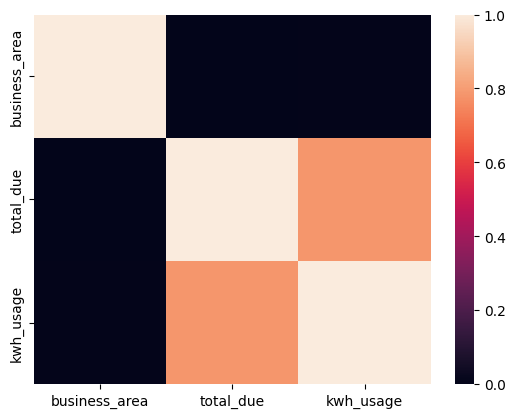

In [71]:
sns.heatmap(data_2014_main.corr())

There do not seem to be any features that have high correlation with kwh usage except total due. But this is to be expected since the amount of energy used is directly proportional to the cost.


###VISUALIZATIONS

In [72]:
data_2014_main = pd.read_csv('Electricity_Usage_Data.csv')

In [73]:
data_2014_main[['bill_date']] = data_2014_main[['bill_date']].apply(pd.to_datetime)

In [74]:
viz_df = data_2014_main.set_index('bill_date')

In [75]:
viz_df.head()

,esid,business_area,service_address,bill_type,total_due,kwh_usage
bill_date,,,,,,
2012-06-26,1008901000140050014100,2000,10518 BELLAIRE,T,73232.11,905421.0
2012-05-25,1008901000140050014100,2000,10518 BELLAIRE,T,68463.46,824107.0
2012-04-27,1008901000140050014100,2000,10518 BELLAIRE,T,80847.87,977744.0
2012-03-27,1008901000140050014100,2000,10518 BELLAIRE,T,74373.93,876838.0
2012-02-27,1008901000140050014100,2000,10518 BELLAIRE,T,74080.27,872898.0


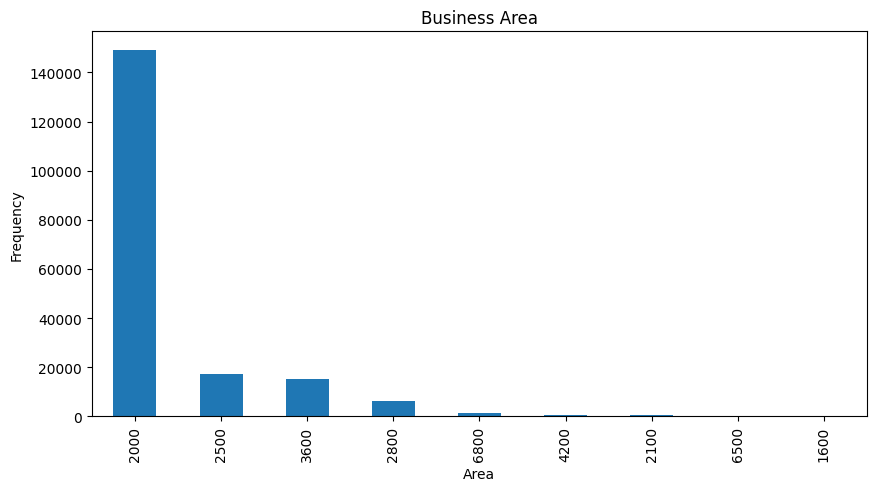

In [94]:
# Bar chart for 'Business Area'
plt.figure(figsize=(10, 5))
data_2014_main['business_area'].value_counts().plot(kind='bar')
plt.title('Business Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

In [95]:
def plotbox(data_2014_main, column):
    plot_features = data_2014_main.groupby(pd.Grouper(freq=str(60)+'T')).mean().copy()
    plot_features[column] = [eval('x.%s'%column) for x in plot_features.index] 
    plot_features.boxplot('kwh_usage', by=column, figsize=(8, 6), grid=False)
    plt.ylabel('kWh Usage')
    plt.xlabel(column)
    plt.show()

C:\Users\sparva3\AppData\Local\Temp\ipykernel_16148\1212594819.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_features = data_2014_main.groupby(pd.Grouper(freq=str(60)+'T')).mean().copy()


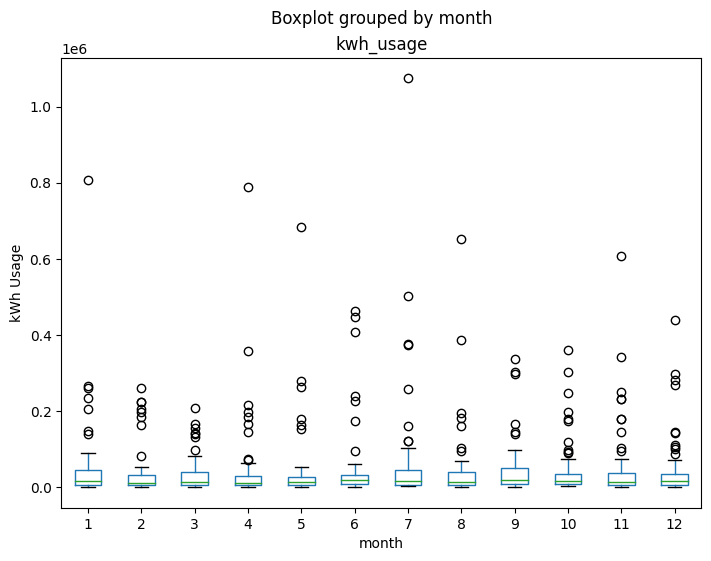

In [77]:
plotbox(viz_df, 'month')

Based on the above box plot, we can see that the highest energy is consumed in the months of June-September. That is in the summer/fall season energy usage is quite high.

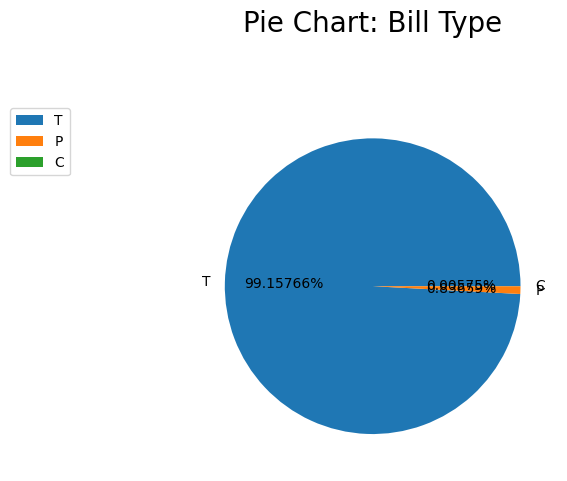

In [96]:
import matplotlib.pyplot as plt
plt.title('Pie Chart: Bill Type',fontsize=20,pad=50)
crimes_data_primary_type_pie = plt.pie(data_2014_main['bill_type'].value_counts().values,labels=data_2014_main['bill_type'].value_counts().index,autopct='%1.5f%%',radius=1)
plt.legend(bbox_to_anchor=(-0.5, 1), loc="upper left")

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information. Most common bill type is T.

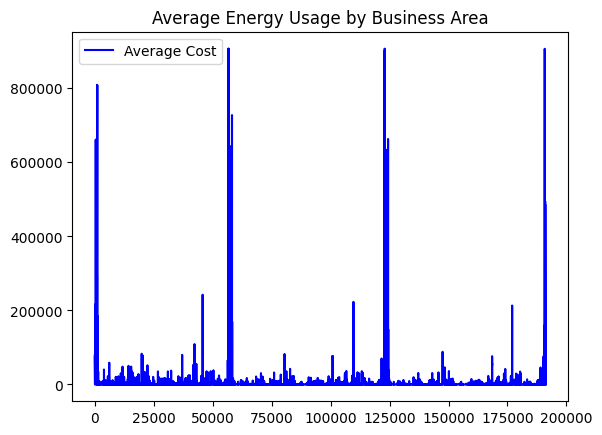

In [79]:
plt.plot(data_2014_main.index, data_2014_main['total_due'], color='b', label='Average Cost')
plt.title('Average Energy Usage by Business Area')
plt.legend()
plt.show()

Monthly energy consumption

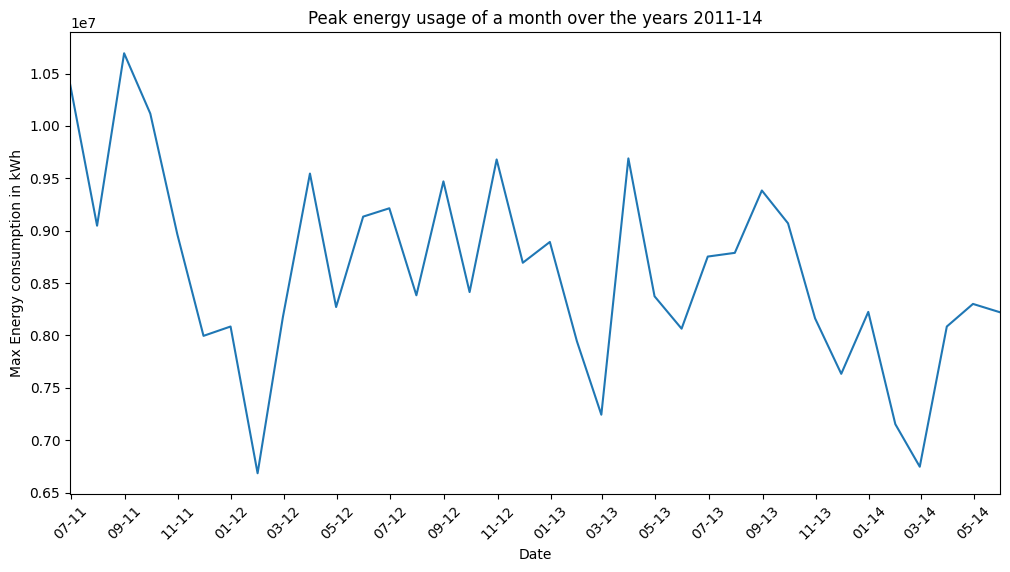

In [80]:
monthly_en = viz_df.resample('M', label = 'left')['kwh_usage'].max()
plt.figure(figsize = (12,6))

#plotting the max monthly energy consumption
plt.plot(monthly_en)
# ensuring the limits on x axis to be between the dataframe's datetime limits
plt.xlim(monthly_en.index.min(), monthly_en.index.max())
# Using matplotlib MonthLocator to be used in the xticks to mark individual months
locator = mdates.MonthLocator(bymonthday = 1, interval = 2)  # every 2 months 
fmt = mdates.DateFormatter('%m-%y') 
X = plt.gca().xaxis
# Setting the locator
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.xticks(rotation = 45)
plt.ylabel('Max Energy consumption in kWh')
plt.xlabel('Date')
plt.title('Peak energy usage of a month over the years 2011-14')
plt.show()

bill_type_counts_by_business_area:


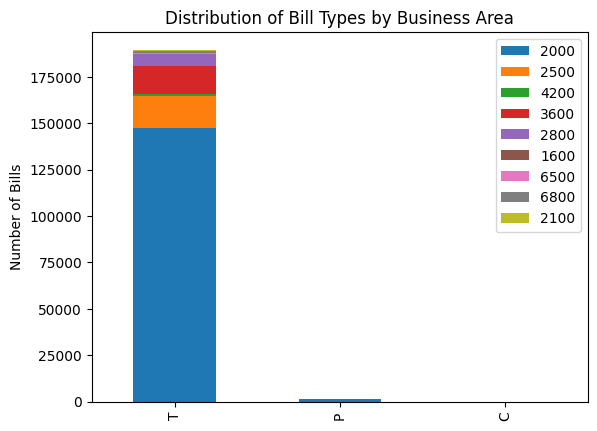

In [81]:
# Stacked bar chart to visualize the distribution of bill types across different business areas
business_areas = data_2014_main['business_area'].unique()
if len(business_areas) > 0:
    bill_types = data_2014_main['bill_type'].unique()


    business_area_counts = []
    for ba in business_areas:
        counts = data_2014_main.loc[data_2014_main['business_area'] == ba]['bill_type'].value_counts()
        business_area_counts.append(counts)

    bill_type_counts_by_business_area = pd.concat(business_area_counts, axis=1, keys=business_areas)
    print('bill_type_counts_by_business_area:')

    bill_type_counts_by_business_area.plot(kind='bar', stacked=True)

    # y-axis label
    plt.ylabel('Number of Bills')

    # Chart title
    plt.title('Distribution of Bill Types by Business Area')

    plt.show()    

### Classification - Task: Predicting Type of Bill - Sharmisha

Models proposed:
1. Logistic Regression - widely used interpretable model which can be used for setting a baseline accuracy. This model assumed linear relationship between the variables, so mighht give bad results

2. Decision Tree Classifier - It can handle the non-linear relationships well between input and target variable. Can be prone to overfitting on the train data.

3. Random Forest Classifier - ensemble model, takes advantage of multiple decision trees to create a powerful model. But this model is not easy to interpret and requires more computational resource to run.

In [82]:
def classification_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f'Train F1 Score: {f1_score(y_train, y_train_pred, average="macro")}')
    print(f'Test F1 Score: {f1_score(y_test, y_test_pred, average="macro")}')

    print(f'Train Accuracy Score: {accuracy_score(y_train, y_train_pred)}')
    print(f'Test Accuract Score: {accuracy_score(y_test, y_test_pred)}')

In [83]:
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_2014_main['address_enc'] = address_enc.fit_transform(data_2014_main['service_address'])
data_2014_main['bill_type_enc'] = bill_type_enc.fit_transform(data_2014_main['bill_type'])
data_2014_main['year'] = data_2014_main['bill_date'].apply(lambda x:x.year)
data_2014_main['month'] = data_2014_main['bill_date'].apply(lambda x:x.month)

X = data_2014_main[[
    'business_area', 'address_enc', 'kwh_usage', 'year', 'month'
]]
y = data_2014_main[['bill_type_enc']]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [85]:
lreg = LogisticRegression().fit(X_train, np.ravel(y_train))

c:\Users\sparva3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
classification_metrics(lreg, X_train, X_test, y_train, y_test)

Train F1 Score: 0.49070301858922133
Test F1 Score: 0.4875581514879594
Train Accuracy Score: 0.9941046522267682
Test Accuract Score: 0.994431518130245


#### Decision Tree Classifier

In [87]:
dtc = DecisionTreeClassifier().fit(X_train, y_train)

In [88]:
classification_metrics(dtc, X_train, X_test, y_train, y_test)

Train F1 Score: 0.9998707454630322
Test F1 Score: 0.6666403148167668
Train Accuracy Score: 0.9999934641377237
Test Accuract Score: 0.9998431413557816


#### Random Forest Classifier

In [89]:
rfc = RandomForestClassifier().fit(X_train, np.ravel(y_train))

In [90]:
classification_metrics(dtc, X_train, X_test, np.ravel(y_train), np.ravel(y_test))

Train F1 Score: 0.9998707454630322
Test F1 Score: 0.6666403148167668
Train Accuracy Score: 0.9999934641377237
Test Accuract Score: 0.9998431413557816


Evaluated the performance of three different classifiers: logistic regression, decision tree classifier, and random forest classifier. The evaluation metrics used are F1 score.

Based on the results, we can see that the logistic regression model has lower F1 scores compared to the other two models. This suggests that the logistic regression model may not be performing as well as the decision tree and random forest models in correctly predicting both positive and negative instances.

The decision tree and random forest models have very high F1 scores and accuracy scores for both the train and test sets. This suggests that these models are doing a good job at predicting both positive and negative instances, and are likely to be reliable in making predictions on new data.

For predicting the type of bill, the Decision Tree Classifier and Random Forest Classifier models both performed similarly with an F1-score of 66%. The Logistic Regression model had a lower F1-score of 43%.